
# Notebook 4: Descriptive Statistics

*Developed by Johannes Haas and Raoul Collenteur, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

### Content of this lecture
- repetition of previous lecture
- some pointers on file types
- basic statistics
- correlations
- fitting linear functions



In [5]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Repeating last week

### 1a. 

# 2. Some pointers on file types




### 2a. Common file types

If you look around on your computer, you'll find various files, generally marked by a symbol/icon and their file extension. E.g a page of paper with a "W" and the ending `.doc` or `.docx` is a word file, if that "W" is an "X" and it ends with `.xls` or `.xlsx`, it's an excel file, and so on.

So normally, you just doubleclick a file, and windows knows what to do with it, and thanks to the icon, you know what's likely going to happen ("W" indicates that word will start...). However, this system has some limitations:
When you change the file ending, you don't necessarily change the file. And icons that point to specific applications can hide the fact that there's also other applications that can open said files.
And as you have already realized, windows sometimes gets confused when saving files from the internet or when opening files it does not know. E.g. when Edge tries to save our notebooks as `.htm` or when you try to open our `.ipynb` files with a simple doubleclick.
So this simple principle offers some pitfalls, when you venture away from the small bunch of standard MS-Office files or when you are working with files that can be opened with many different applications.

There are various ways to improve this situation such as "[magic numbers](https://en.wikipedia.org/wiki/Magic_number_(programming))" and the use of metadata. However, for our use case, the file extension and a bit of thinking will work.

### 2b. text files

Most of the files we are using are just simple text files.
The CSV files from the previous lecture, are nothing more than a text file (`.txt`) with a different file extension (`.csv`) and a few rules for its formatting.
Similarly, the jupyter notebook is also just a simple text file, but with the ending `.ipynb` and certain rules that govern its structure.


In [ ]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "\n",
    "# Notebook 4: Descriptive Statistics\n",
    "\n",
    "*Developed by Johannes Haas and Raoul Collenteur, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*\n",
    "\n",
    "### Content of this lecture\n",
    "- repetition of previous lecture\n",
    "- some pointers on file types\n",
    "- basic statistics\n",
    "- correlations\n",
    "- fitting linear functions\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Import the python packages needed in this session\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "%matplotlib inline"
   ]
  },

The *code* above is just the first two cells of this notebook, opened in a text editor.
You can probably already read quite a bit of this code, applying what you have learned so far, even though you probably don't know the *language* it is written in.

For just editing the notebook, a text editor works just as well as our browser, but we have to deal with much more formatting commands and we can not work with the python parts interactively.

# 3. Basic Statistics

What basic statistics have we already done so far?



In [16]:
values = np.random.rand(100)

In [68]:
print(values.mean())
print(values.std())
print(values.min())
print(values.max())
print(len(values))

0.49251232596104577
0.24599317096414067
0.010799430858482562
0.953493823523032
100


### 3a. The Bell Curve/Normal Distribution

*Mostly called Gauß-Verteilung in German*

We have already worked with principles such as *mean* and the *standard deviation* that we applied to random values.
However, most processes in nature are not really totally random, but follow certain probability density functions, with the most well known one being the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) or [Gauß-Verteilung](https://de.wikipedia.org/wiki/Normalverteilung) in German, with its characteristic bell shape.

In the following code cells, we are going to produce such a dataset and figure out what this bell shape means.

First, we have to produce a random dataset, that follows the normal distribution:

In [51]:
GaussData = np.random.normal(10, 5, 1000)

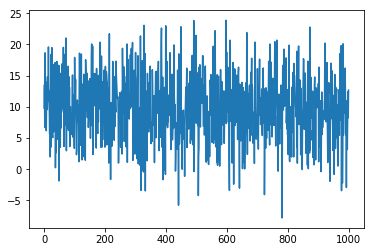

In [52]:
plt.plot(GaussData)

As you can clearly see, your data does not looks very bell-like.
In order to turn it into the bell, we do not have to plot the values, but their counts!
Again, `matplotlib`, which we have imported at the beginning, is there to help:


(array([  2.,  14.,  49., 100., 180., 264., 205., 119.,  53.,  14.]),
 array([-7.81549245, -4.64547315, -1.47545386,  1.69456543,  4.86458472,
         8.03460401, 11.2046233 , 14.37464259, 17.54466188, 20.71468117,
        23.88470046]),
 <a list of 10 Patch objects>)

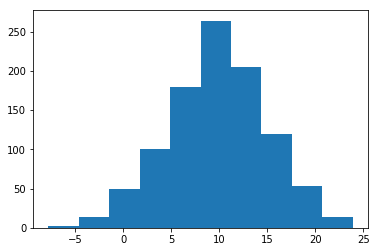

In [53]:
plt.hist(GaussData)

Ypu can probably already already start to see some kind of bell shape. However, the bins we have used to sort our data have been decided by matplotlib, and they are not really the ideal size.
Check out the documentation for `plt.hist()` (either with the `?` feature or [online](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)) and replot the chart above with a bin size of 2.

In [54]:
bins = np.arange(-5,26,2)

In [55]:
bins

array([-5, -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

(array([  7.,   8.,  29.,  42.,  80., 107., 140., 183., 130., 113.,  78.,
         42.,  25.,  11.,   3.]),
 array([-5, -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
 <a list of 15 Patch objects>)

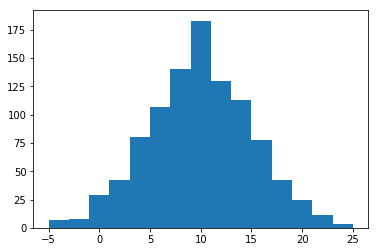

In [56]:
plt.hist(GaussData, bins)

While the data did not change, the distribution is likely a bit clearer now.
Now we can also see what the `10` and `5` in our intial setup (`GaussData = np.random.normal(10, 5, 1000)`) meant.
We have used the mean and the standard deviation as an input to produce a *random* normal distribution.

In [59]:
mu = GaussData.mean()
print('the mean is', mu)

the mean is 9.892661356294024


In [60]:
sigma = GaussData.std()
print('the standard deviation is', sigma)

the standard deviation is 5.1163869836808775


The standard deviation (mostly abbreviated with $\sigma$) has a particular meaning for the normal distribution:
about 68.3 % of all samples are within $\pm \sigma$ from the mean.

Write a small script to figure out how many of our samples are indeed in the $\pm \sigma$ interval, using what you learned in the last lectures (loops and conditional statements):

In [66]:
withinSigma = 0
outsideSigma = 0
for sample in GaussData:
    if (sample < (mu + sigma)) & (sample > (mu - sigma)):
        withinSigma = withinSigma + 1
    else:
        outsideSigma = outsideSigma + 1

print('sample within one std from mean:', withinSigma)
print('sample outside one std from mean:', outsideSigma)
print((withinSigma /(len(GaussData) / 100)), '\% of samples are within one stad from the mean.')

sample within one std from mean: 683
sample outside one std from mean: 317
68.3 \% of samples are within one stad from the mean.


In [63]:
len(GaussData)

1000

# 4. Correlations


# 5. Fitting Linear Functions

# 6. Exercises